In [1]:
import requests
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_csv(r"C:\Users\admin\Desktop\project\Hotels_Price_Analysis.csv")
#df.drop(columns=["Unnamed: 0"],inplace=True)

In [4]:
df.shape

(400, 8)

### Here based on rating we are creating another column named Remarks

In [5]:
def rating(rating):
    if rating>=4.4:
        return 'Excellent'
    elif rating>=3.3 and rating<4.4:
        return 'Good'
    else:
        return 'Average'

In [6]:
df['Remark']=df['Ratings'].apply(rating)

In [7]:
df.shape

(400, 9)

In [8]:
df.head()

,Hotel_Names,Distance,Address,City,Ratings,Votes,Prices,Features,Remark
0,OYO Flagship 704007 Hotel Ashoka Classic,0.4,Hyderabad,Hyderabad,4.1,35,626,Elevator Geyser Power backup,Good
1,OYO Flagship 80484 Simra Relax Inn,4.1,Hyderabad,Hyderabad,4.6,37,626,Geyser Power backup AC,Excellent
2,OYO 14669 Mayur's Residency,2.4,"Near Sri Krupa Market, Malakpet",Hyderabad,4.0,1014,614,Free Wi-Fi AC AC,Good
3,OYO 88286 Hotel Padmini,3.4,Lakdikapul,Hyderabad,3.7,245,814,Hair Dryer Reception Power backup,Good
4,OYO SilverKey 74144 Himayat Nagar Circle,1.3,Narayanguda,Hyderabad,3.6,2202,936,Private entrance Hair Dryer Reception,Good


In [ ]:
df.to_csv("finalcsv")

In [11]:
df.describe()

,Distance,Ratings,Votes,Prices
count,400.000000,400.000000,400.000000,400.000000
mean,6.258000,3.662000,902.482500,958.642500
std,2.408545,0.833903,1151.922436,461.216333
min,0.400000,0.000000,1.000000,444.000000
25%,4.700000,3.500000,138.000000,621.000000
50%,6.500000,3.800000,504.000000,842.000000
75%,8.300000,4.200000,1198.500000,1172.750000
max,10.000000,5.000000,8182.000000,3604.000000


In [12]:
df.describe(include='O')

,Hotel_Names,Address,City,Features,Remark
count,400,400,400,400,400
unique,356,315,4,123,3
top,Townhouse Oak Hotel Lake View Royal,Near New Delhi Railway Station,Hyderabad,Parking facility Reception Free Wi-Fi,Good
freq,2,8,100,39,282


In [13]:
df.columns

Index(['Hotel_Names', 'Distance', 'Address', 'City', 'Ratings', 'Votes',
       'Prices', 'Features', 'Remark'],
      dtype='object')

### Data Visualization
### Univarient
### Numerical 

### Hotels Rating which are more than 4.5

In [14]:
r=df[df['Ratings']>4.5]
r

,Hotel_Names,Distance,Address,City,Ratings,Votes,Prices,Features,Remark
1,OYO Flagship 80484 Simra Relax Inn,4.1,Hyderabad,Hyderabad,4.6,37,626.0,Geyser Power backup AC,Excellent
35,OYO Townhouse RCC Majestic 397 LB Nagar,6.1,Champapet,Hyderabad,4.7,3516,2199.0,Parking facility Free Wi-Fi AC,Excellent
100,SPOT ON 41554 Hotel Sri Thirumala Paradise,2.8,Sevashrama,Bangalore,4.6,3632,559.0,Free Wi-Fi CCTV cameras Power backup,Excellent
101,SPOT ON 65593 Yatra Inn,2.0,Lalbagh,Bangalore,4.6,2717,829.0,Reception Free Wi-Fi CCTV cameras,Excellent
153,Collection O 26188 Domus Regency,8.0,"Near Swastha Restaurant, Vijay Nagar",Bangalore,5.0,23,1257.0,AC TV Mini Fridge,Excellent
165,Townhouse OAK Clove Boutique Hotel Rajaji Nagar,4.0,"4th Block, Rajaji Nagar",Bangalore,4.6,1390,2492.0,Parking facility Private entrance Elevator,Excellent
167,Collection O 31939 CTC Gardenia Residency,2.0,India -,Bangalore,5.0,90,1658.0,Parking facility Reception Free Wi-Fi,Excellent
202,OYO 15515 Hotel Landmark Inn,5.1,Near Karol Bagh Metro Station,Delhi,4.7,4278,1319.0,Hair Dryer Free Wi-Fi Power backup,Excellent
209,OYO Townhouse 610 Derawal Nagar,3.4,"Near Vinayak Hoptiat, Gujranwala Town",Delhi,5.0,2811,2550.0,Private entrance Reception Free Wi-Fi,Excellent
213,OYO Flagship 88508 Hotal Pleasant Inn,7.6,Indianull,Delhi,5.0,2,564.0,Free Wi-Fi Geyser CCTV cameras,Excellent


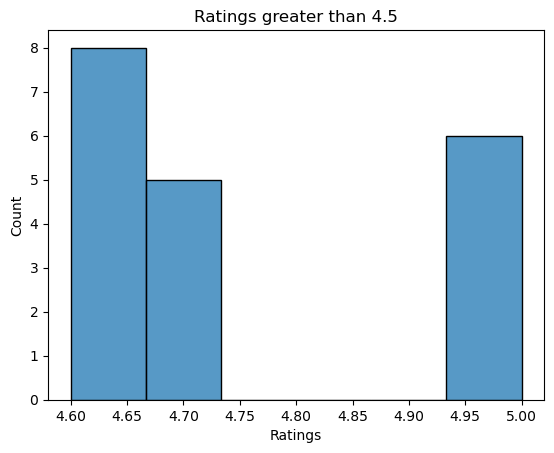

In [15]:
sns.histplot(data=r,x='Ratings')
plt.title('Ratings greater than 4.5')
plt.show()


* from the above plot we can see count of hotels where rating starts from 4.5 to 5.0

### Distance form city to Adresss less than 1.0 km

In [16]:
d=df[df['Distance']<1.0]
d

,Hotel_Names,Distance,Address,City,Ratings,Votes,Prices,Features,Remark
0,OYO Flagship 704007 Hotel Ashoka Classic,0.4,Hyderabad,Hyderabad,4.1,35,626.0,Elevator Geyser Power backup,Good
13,OYO 70927 Hotel Hyderabad Continental,0.7,"Near Tarakarama Theatre, Sultan Bazar",Hyderabad,3.8,1519,1345.0,TV King Sized Bed Dress Hanger,Good
18,Capital O 44585 Sri Suprabhat Grand,0.8,Nera Venkataramana Theater,Hyderabad,4.0,483,1231.0,Parking facility Reception Free Wi-Fi,Good
31,Capital O 44585 Sri Suprabhat Grand,0.8,Nera Venkataramana Theater,Hyderabad,4.0,483,1231.0,Parking facility Reception Free Wi-Fi,Good
38,OYO 70927 Hotel Hyderabad Continental,0.7,"Near Tarakarama Theatre, Sultan Bazar",Hyderabad,3.8,1519,1345.0,TV King Sized Bed Dress Hanger,Good
386,Flagship 74922 Penguin Homes,0.7,Beside Yogayog Bhavan,Kolkata,4.4,1093,1959.0,Free Wi-Fi Geyser CCTV cameras,Excellent


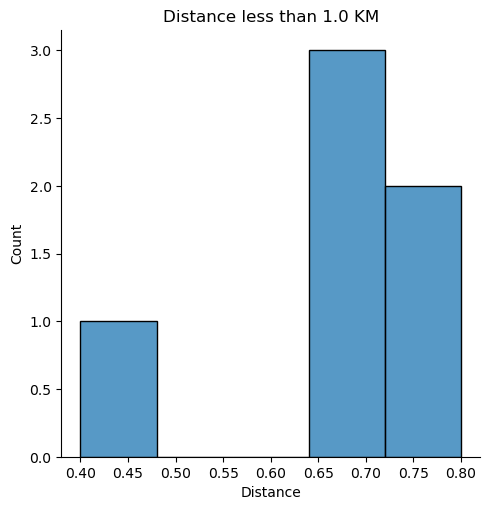

In [17]:
sns.displot(data=d,x='Distance')
plt.title('Distance less than 1.0 KM')
plt.show()

* from the above plot we are getting the count of hotels less than 1 km

### Hotel votes which are greater than 3000 

In [18]:
v=df[df['Votes']>3000]
v

,Hotel_Names,Distance,Address,City,Ratings,Votes,Prices,Features,Remark
5,OYO Townhouse 600 Gangothri,5.7,Near RP Road BUS STOP,Hyderabad,4.4,3179,1300.0,Private entrance Parking facility Reception,Excellent
7,OYO 49253 Raja Residency,3.7,"Near Raja Deluxe Complex, Musheerabad",Hyderabad,4.2,3862,918.0,Private entrance Parking facility Reception,Good
14,Flagship 77043 Malkajgiri,8.8,Malkajgiri,Hyderabad,4.2,3156,546.0,Parking facility Reception Free Wi-Fi,Good
23,Capital O 11079 Hotel Prestige,6.3,"Centrally Located, Near Sun Shine Hospital, Pa...",Hyderabad,4.4,4229,1580.0,Parking facility Elevator Free Wi-Fi,Excellent
28,Flagship 77043 Malkajgiri,8.8,Malkajgiri,Hyderabad,4.2,3156,546.0,Parking facility Reception Free Wi-Fi,Good
35,OYO Townhouse RCC Majestic 397 LB Nagar,6.1,Champapet,Hyderabad,4.7,3516,2199.0,Parking facility Free Wi-Fi AC,Excellent
57,OYO Townhouse 164 ESI Hospital,8.8,Sanath Nagar,Hyderabad,4.5,4565,2025.0,Private entrance Reception Free Wi-Fi,Excellent
63,OYO Townhouse 196 De Alphabet,4.9,"Near Sai Baba Temple, Gudimalkapur",Hyderabad,4.2,3372,1447.0,Parking facility Reception Free Wi-Fi,Good
72,OYO Townhouse 600 Gangothri,5.7,Near RP Road BUS STOP,Hyderabad,4.4,3179,1300.0,Private entrance Parking facility Reception,Excellent
95,OYO SilverKey 81097 Silverkey Halcyon Magnus,9.2,Sanath Nagar,Hyderabad,3.8,5237,2076.0,AC TV Queen Sized Bed,Good


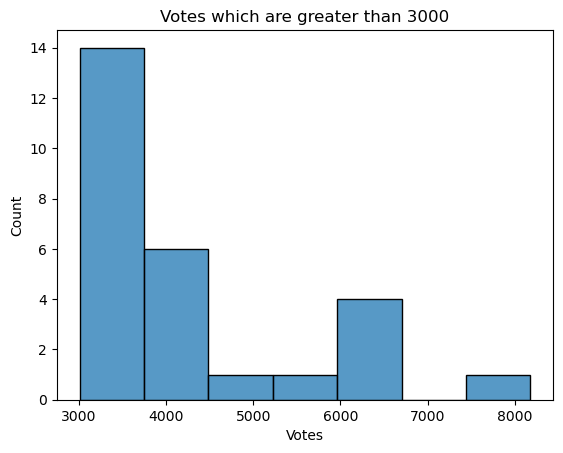

In [19]:
sns.histplot(data=v,x='Votes')
plt.title("Votes which are greater than 3000")
plt.show()

 * from the above plot we are getting the count of hotels greater than 3000 votes

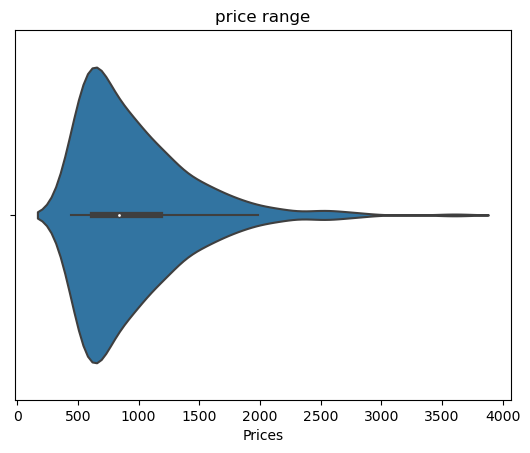

In [20]:
sns.violinplot(data=df,x='Prices')
plt.title("price range")
plt.show();

* from the above the middle dark line is called density it means the more prices are in that range an here most of hotel price are in the range of 500-1500

In [27]:
px.histogram(df['Prices'],x='Prices',title='Prices and its count')

* from above graph we will get exact number of hotels, and the price range,when we place cursor on that blue bar we will get variable,value,count

C:\Users\admin\AppData\Local\Temp\ipykernel_2356\2728559003.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




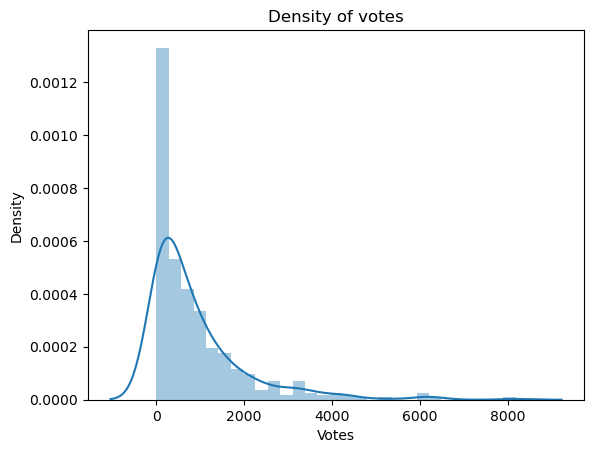

In [19]:
sns.distplot(df['Votes'])
plt.title("Density of votes")
plt.show();

* from the above graph we can conclude the desnity is more in the range 0-2000 votes ,so most of the hotel votes are in that range

<AxesSubplot:xlabel='Ratings'>

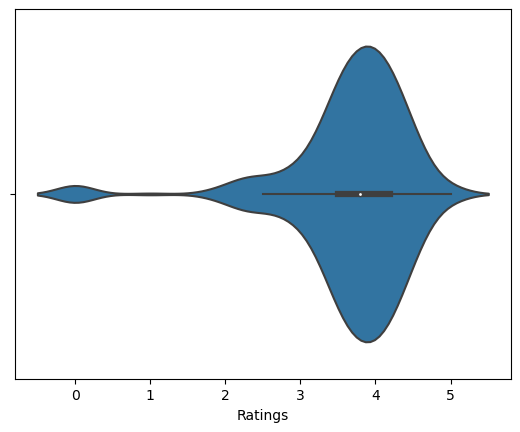

In [20]:
sns.violinplot(data=df,x='Ratings')

* from the above graph the middle line is called density it means the more ratings are in that range,so we can conclude that
more hotel ratings are in that range

### Categorical columns

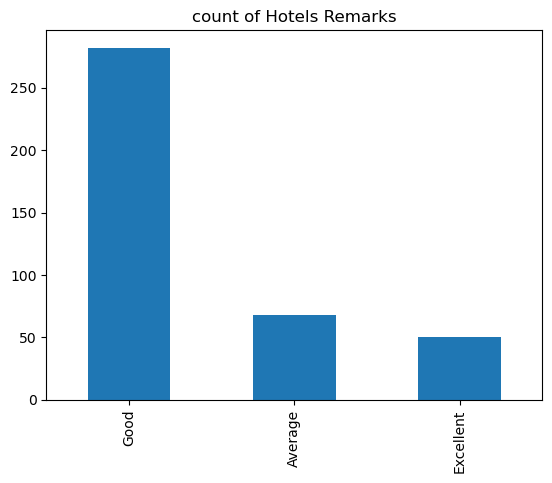

In [21]:
df['Remark'].value_counts().plot(kind='bar')
plt.title("count of Hotels Remarks")
plt.show()

* from above graph we are getting count of total number of good,average and excellent  hotels in all cities 

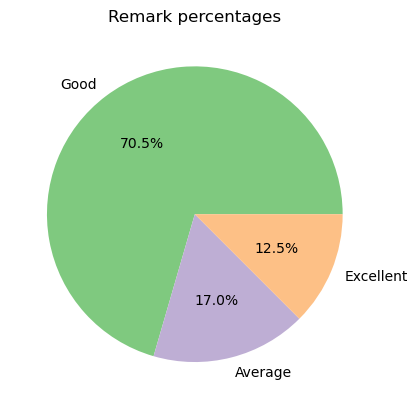

In [22]:
color_sns=sns.color_palette("Accent")
plt.pie(df['Remark'].value_counts(),labels=df['Remark'].value_counts().index,autopct="%1.1f%%",colors=color_sns)
plt.title("Remark percentages")
plt.show()

* from the above grapgh here we are getting the percentage of Good,average and excellent hotels in each city

In [23]:
px.bar(df['Remark'].value_counts(),title='Remark catagories')

* From the above graph we can coclude that most number of hotels are good

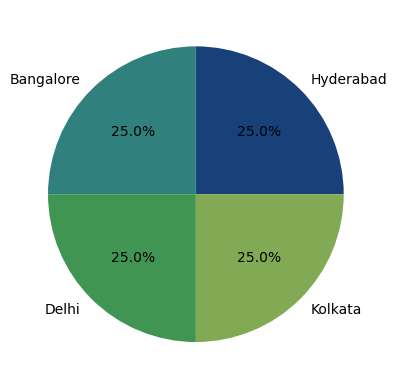

In [24]:
color_sns=sns.color_palette("gist_earth")
plt.pie(df['City'].value_counts(),labels=df['City'].value_counts().index,autopct="%1.1f%%",colors=color_sns)
plt.show()

* from above grapgh  we are getting the percentage of hotels in each city 

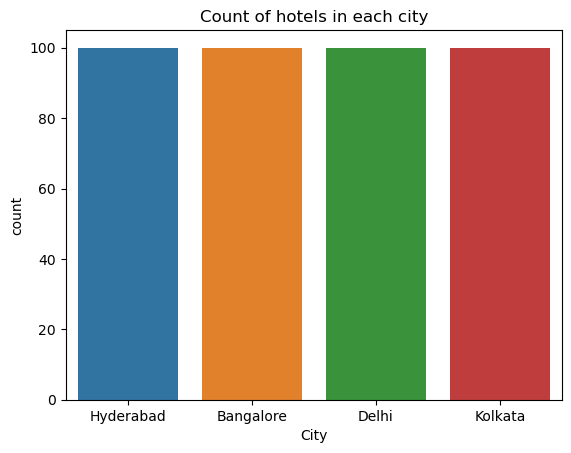

In [25]:
sns.countplot(data=df,x='City')
plt.title("Count of hotels in each city")
plt.show()

* from above graph we are getting count of total number of hotels in each city 

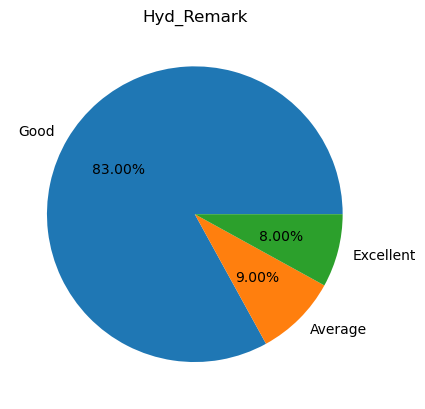

In [26]:
temp1=df[df['City']=='Hyderabad']
a=temp1['Remark'].value_counts()
plt.pie(a,labels=a.index,autopct='%0.2f%%')
plt.title('Hyd_Remark')
plt.show()

* from above graph we are getting the exact percentage of hotels  which belongs to the remark catagorie in hyderabad city.

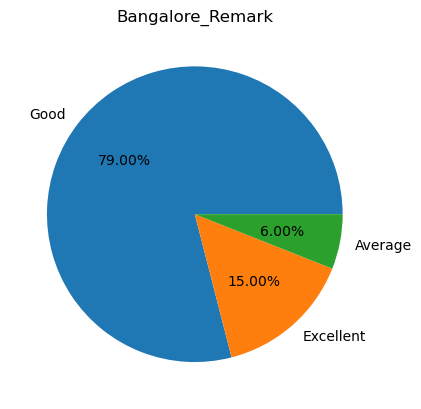

In [27]:
temp1=df[df['City']=='Bangalore']
a=temp1['Remark'].value_counts()
plt.pie(a,labels=a.index,autopct='%0.2f%%')
plt.title('Bangalore_Remark')
plt.show()


* from above graph we are getting the exact percentage hotes which belongs to the remark catagorie in Bangalore.

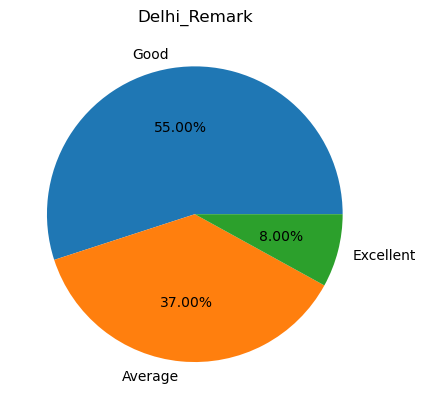

In [28]:
temp1=df[df['City']=='Delhi']
a=temp1['Remark'].value_counts()
plt.pie(a,labels=a.index,autopct='%0.2f%%')
plt.title('Delhi_Remark')
plt.show()

* from above graph we are getting the exact percentage hotes which belongs to the remark catagorie in Delhi .

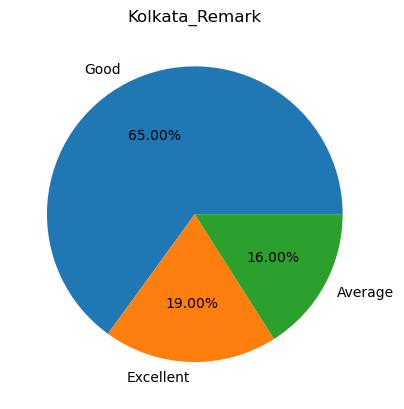

In [29]:
temp1=df[df['City']=='Kolkata']
a=temp1['Remark'].value_counts()
plt.pie(a,labels=a.index,autopct='%0.2f%%')
plt.title('Kolkata_Remark')
plt.show()

from above graph we are getting the exact percentage hotes which belongs to the remark catagorie in Kolkata .

In [ ]:
city=input('enter the name of city :')
temp1=df[df['City']==city] 
a=max(temp1['Prices'])
print(a)



* with the help of these code we can know the max price in any city

### Bivariant
### Num vs Num

In [ ]:
px.scatter(x=df['Votes'],y=df['Ratings'])

* from above graph we can conclude if the votes are increasing then rating also will increase

### cat vs num

In [ ]:
sns.barplot(x='Remark',y='Votes',data=df,orient='v')
plt.title("Number of votes based on Remark")
plt.show()

* from the above graph we can conclude that most of the hotels which are in excellent category have more votes

In [ ]:
px.strip(x=df['City'],y=df['Prices'],title="Highest price hotels in four titles")

* from the above plot we can conclude that Bangalore has highest price hotels

In [ ]:
sns.scatterplot(x='Remark',y='Prices',data=df)
plt.title("prices based on Remarks")
plt.show()

* from the above graph we can conclude that most of the hotels which are in excellent category have more prices

### cat vs cat

In [ ]:
temp1=df[df['City']=='Hyderabad']
temp2=temp1[temp1['Remark']=='Excellent']

* from the above we are getting excellent category hotels in Hyderabad

In [ ]:
sns.barplot(data=temp2,x='Hotel_Names',y='Prices')
plt.title("hyd Excellent hotels prices ")
plt.xticks(rotation=90)
plt.show()

* from the above graph we can conclude these are the best hotels in hyderabad city and from the above we observed that these particular RCC Majestic 397 LB Nagar hotel has max price

###  MULTI VARIENT

In [ ]:
r=df[df['Distance']<2]
len(r)

* from above code we are getting the hotels whose distance is less than 2kms from the city to address

In [ ]:
sns.barplot(data=r,y='Ratings',x='Hotel_Names',hue='City')
plt.title("Hotels distance which are less than 2kms from the city")
plt.xticks(rotation=90);
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

* from the above graph we can observe that bangalore city hotels has max number of ratings when compare to other city and these all hotels has a distance less than 2 kms from the coressponding city

In [ ]:
sns.scatterplot(y=df['Ratings'],x=df['Votes'],hue=df['City'])
plt.legend(bbox_to_anchor=(1.5,1))

* from the above graph we can conclude that most of the hotels lie with in the range of 0-3000 votes and kolkata has the max rating 

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

* from the above plot we can conclude that there are positive relations and negative relationship the positive relation and the positive relation depicts the relation between the two different columns where as negative relation doesnot effect any columns 

In [ ]:
df

In [ ]:
Hotel_Names=input('Enter the Hotel_Name: ')
City=input('Enter the City: ')
a=df[(df['Hotel_Names']==Hotel_Names)&(df['City']==City)]
a